In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

In [4]:
len(imagens_treino)
identificacoes_treino.shape

(60000,)

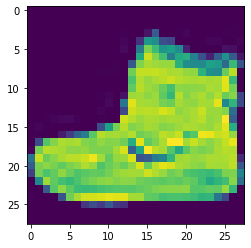

In [5]:
plt.imshow(imagens_treino[0])

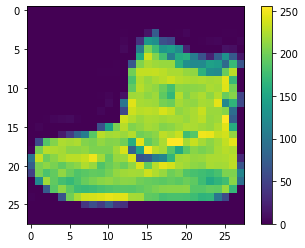

In [6]:
plt.imshow(imagens_treino[0])
plt.colorbar()

In [7]:
print(identificacoes_treino.max())

9


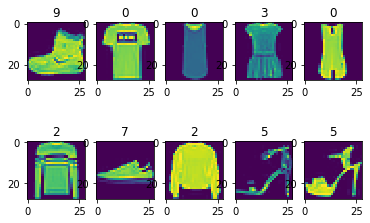

In [8]:
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(identificacoes_treino[imagem])

In [9]:
nomes_das_classificacoes = ["Camiseta", "Calça", "Pullover", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis",
                           "Bolsa", "Bota"]

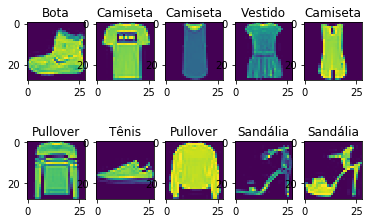

In [10]:
for imagem in range(10):
    plt.subplot(2,5,imagem+1)

    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_das_classificacoes[identificacoes_treino[imagem]])

In [11]:
#normalização
imagens_teino = imagens_treino/255

In [12]:
modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
#                            keras.layers.Dense(128, activation=tensorflow.nn.relu),
#                            keras.layers.Dense(64, activation=tensorflow.nn.relu),
#                            keras.layers.Dense(32, activation=tensorflow.nn.relu),
#                            keras.layers.Dense(16, activation=tensorflow.nn.relu),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])

In [13]:
modelo.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
historico = modelo.fit(imagens_treino,identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 3.4552 - accuracy: 0.6357 - val_loss: 0.7391 - val_accuracy: 0.7552
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8785 - accuracy: 0.6794 - val_loss: 0.7580 - val_accuracy: 0.6902
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7721 - accuracy: 0.7148 - val_loss: 0.7202 - val_accuracy: 0.7648
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7579 - accuracy: 0.7237 - val_loss: 0.6915 - val_accuracy: 0.7682
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7309 - accuracy: 0.7372 - val_loss: 0.5955 - val_accuracy: 0.7971
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7134 - accuracy: 0.7451 - val_loss: 0.5760 - val_accuracy: 0.8117
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7028 - accuracy: 0.7515 - val_loss: 0.5352 - val_accuracy:

In [15]:
testes = modelo.predict(imagens_teste)

In [16]:
np.argmax(testes[1])

2

In [17]:
identificacoes_teste[1]

2

In [18]:
modelo.evaluate(imagens_teste, identificacoes_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.5856 - accuracy: 0.8178


[0.585573673248291, 0.817799985408783]

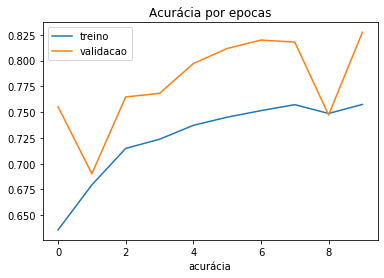

In [19]:
historico.history
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title("Acurácia por epocas")
plt.xlabel("epocas")
plt.xlabel("acurácia")
plt.legend(['treino','validacao'])

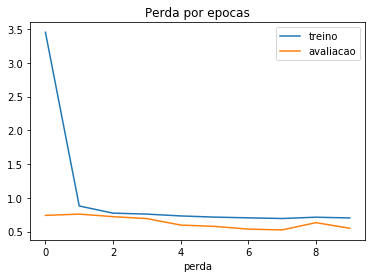

In [20]:
historico.history
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title("Perda por epocas")
plt.xlabel("epocas")
plt.xlabel("perda")
plt.legend(['treino','avaliacao'])

In [21]:
modelo.save('modelo.h5')

In [22]:
modelo_salvo = load_model('modelo.h5')

In [23]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)

In [24]:
np.argmax(testes_modelo_salvo[1])

2

In [25]:
print(identificacoes_teste[1])

2


In [36]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [38]:
pesos_camada_dense = modelo.layers[1].get_weights()

In [40]:
len(pesos_camada_dense)

2